In [10]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
sns.set(style ="whitegrid") # Set the style of the plots

df = pd.read_csv('../data/superstore_sales_cleaned.csv')  # Load the dataset

df.head()  # Display the first few rows of the dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Num,Profit Margin (%),Discounted Sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,November,11,0.1600,261.960000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,November,11,0.3000,731.940000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,June,6,0.4700,14.620000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,October,10,-0.4000,526.667625
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,October,10,0.1125,17.894400


In [20]:
print("Shape of the dataset:", df.shape) # Print the shape of the dataset
print("\n Columns in the dataset:", df.columns.tolist())   # Print the columns in the dataset
print("\n Summary Statistics")
print(df[['Sales', 'Profit', 'Discount', 'Profit Margin (%)']].describe())  # Print summary statistics for the 'Sales' and 'Profit' columns

Shape of the dataset: (9994, 26)

 Columns in the dataset: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Month_Num', 'Profit Margin (%)', 'Discounted Sales']

 Summary Statistics
              Sales       Profit     Discount  Profit Margin (%)
count   9994.000000  9994.000000  9994.000000        9994.000000
mean     229.858001    28.656896     0.156203           0.120314
std      623.245101   234.260108     0.206452           0.466754
min        0.444000 -6599.978000     0.000000          -2.750000
25%       17.280000     1.728750     0.000000           0.075000
50%       54.490000     8.666500     0.200000           0.270000
75%      209.940000    29.364000     0.200000           0.362500
max    22638.480000  8399.976000     0.800000           0.500000


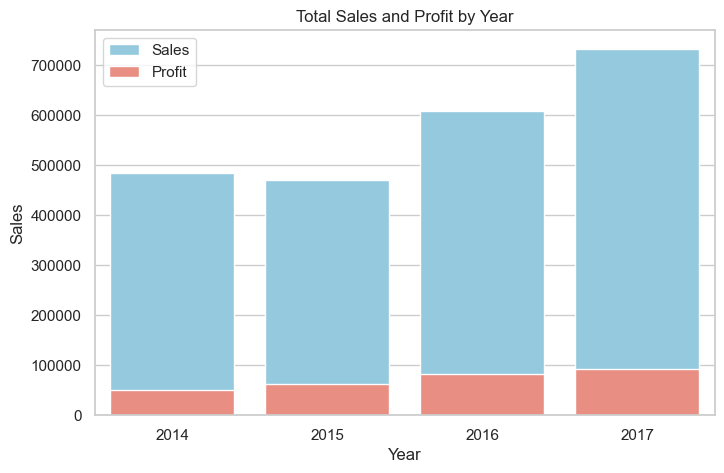

In [21]:
sales_by_year = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()  # Aggregate sales and profit by year

plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Sales', data=sales_by_year, color='skyblue', label='Sales')  # Create a bar plot for sales by year
sns.barplot(x='Year', y='Profit', data=sales_by_year, color='salmon', label='Profit')  # Create a bar plot for profit by year
plt.title("Total Sales and Profit by Year")
plt.legend()
plt.show()

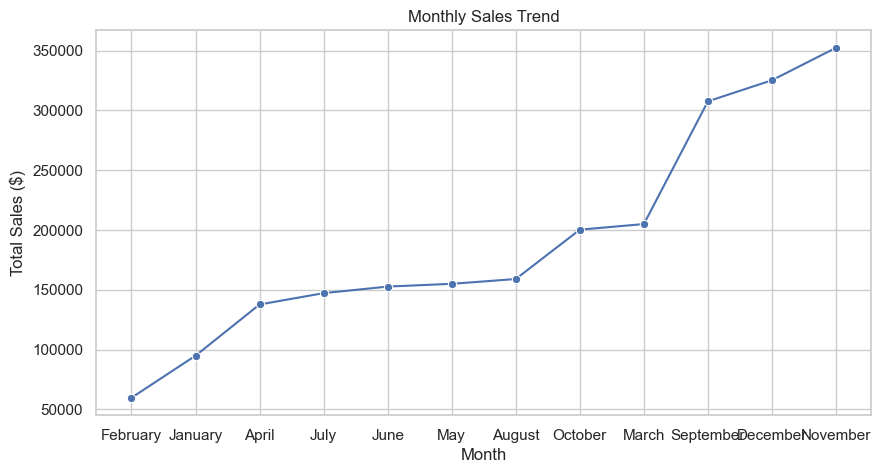

In [27]:
monthly_sales = df.groupby(['Month_Num', 'Month'])['Sales'].sum().sort_values().reset_index()  # Aggregate sales by month

plt.figure(figsize=(10, 5))
sns.lineplot(x= 'Month', y='Sales', data=monthly_sales, marker='o')  # Create a line plot for monthly sales
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()








C:\Users\David\AppData\Local\Temp\ipykernel_33628\3467481354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_perf, palette='Blues_d')  # Create a bar plot for sales by region


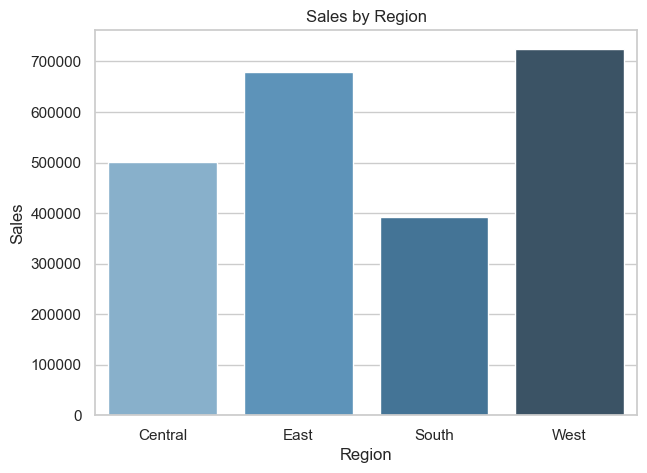

C:\Users\David\AppData\Local\Temp\ipykernel_33628\3467481354.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_perf, palette='Greens_d')  # Create a bar plot for profit by region


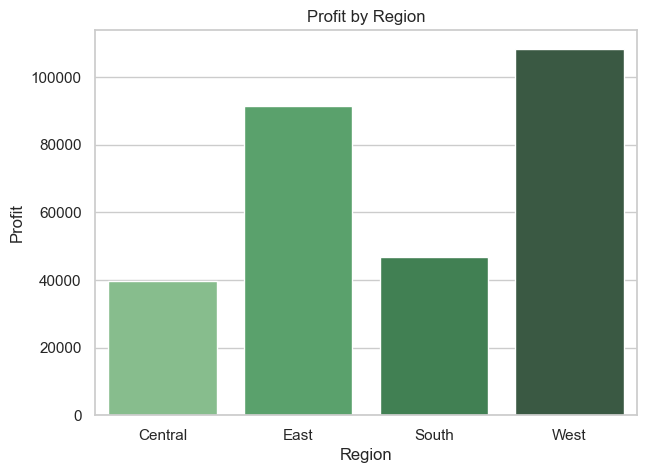

In [28]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()  # Aggregate sales and profit by region

plt.figure(figsize=(7, 5))
sns.barplot(x='Region', y='Sales', data=region_perf, palette='Blues_d')  # Create a bar plot for sales by region
plt.title("Sales by Region")
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x='Region', y='Profit', data=region_perf, palette='Greens_d')  # Create a bar plot for profit by region
plt.title("Profit by Region")
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_33628\2807449969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=cat_perf, palette='cool', ax=ax[0])  # Bar plot for sales by category
C:\Users\David\AppData\Local\Temp\ipykernel_33628\2807449969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=cat_perf, palette='summer', ax=ax[1])  # Bar plot for profit by category


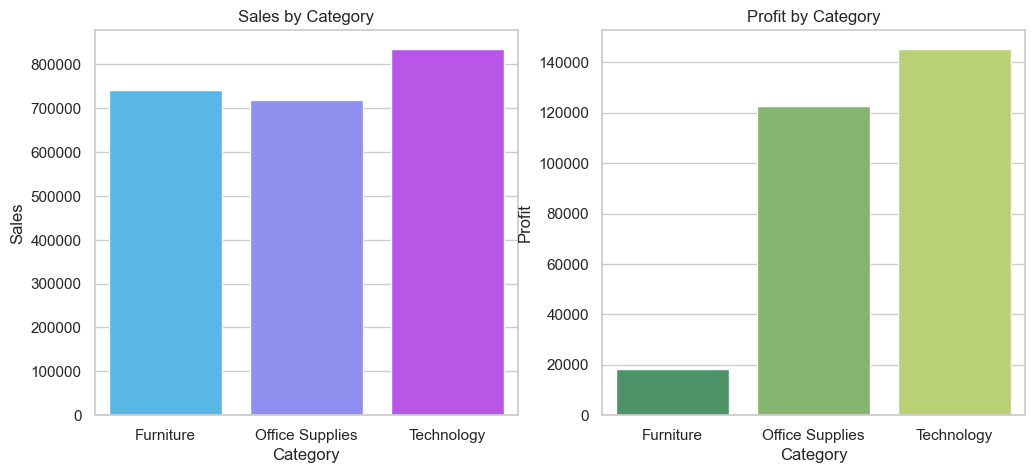

In [ ]:
cat_perf = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()  # Aggregate sales and profit by category

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # Create subplots for category performance
sns.barplot(x='Category', y='Sales', data=cat_perf, palette='cool', ax=ax[0])  # Bar plot for sales by category
ax[0].set_title("Sales by Category")

sns.barplot(x='Category', y='Profit', data=cat_perf, palette='summer', ax=ax[1])  # Bar plot for profit by category
ax[1].set_title("Profit by Category")
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_33628\306214989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')  # Bar plot for top customers by profit


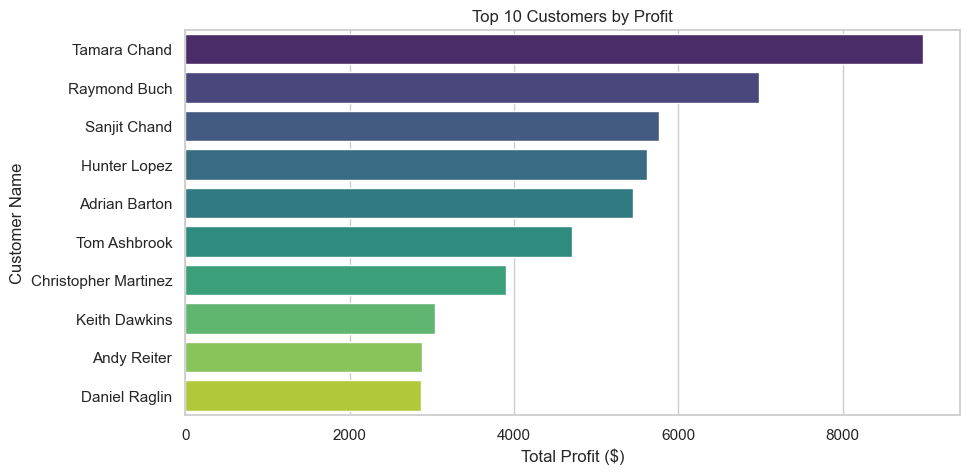

In [30]:
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending = False).head(10) # Top 10 customers by profit

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')  # Bar plot for top customers by profit
plt.title("Top 10 Customers by Profit")
plt.xlabel("Total Profit ($)")
plt.show()




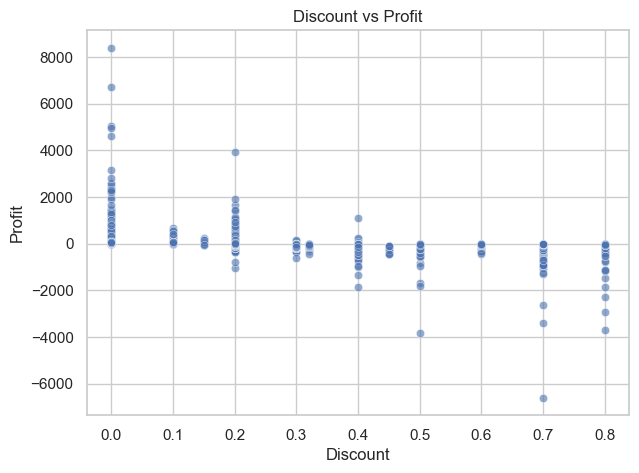

In [32]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)  # Scatter plot for discount vs profit
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

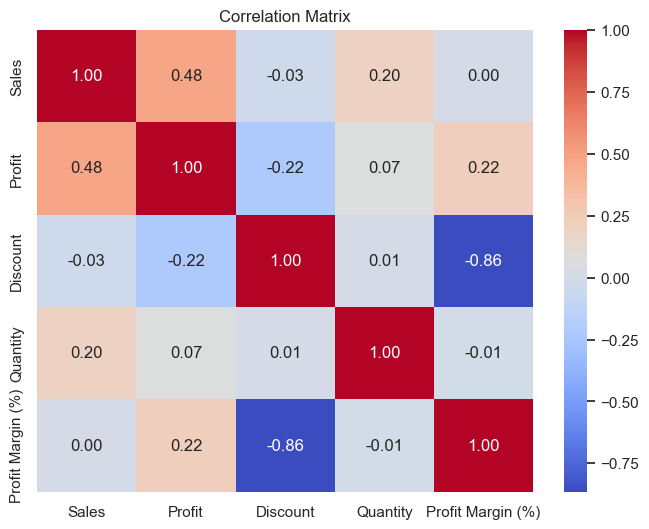

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin (%)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap for correlation matrix
plt.title("Correlation Matrix")
plt.show()

In [34]:
sales_by_region = df.groupby('Region')[['Sales','Profit']].sum() # Aggregate sales and profit by region
sales_by_region.to_csv('../data/sales_by_region.csv')  # Save the aggregated data to a CSV file